<p align="center">
    <img src="../src/images/Sikit_learn_logo.png" alt="Icon Scikit-Learn" width="50" align="left">
</p>

# Exercise Implementing K-mean algorithm for Dataset Iris with and without using Scikit-learn
---
- Name: Stefanus Bernard Melkisedek
- Bangkit ID: m741d4ky3073
- Email: stefanussipahutar@gmail.com


## Introduction

In this exercise, I will implement the K-mean algorithm for the Iris dataset. **The Iris dataset consists of 150 samples** of iris flowers. Each sample has four features: sepal length, sepal width, petal length, and petal width. 

The samples are labeled with three classes: **setosa**, **versicolor**, and **virginica**. **The goal** of this exercise **is to cluster the samples into three clusters using the K-mean algorithm**. I will implement the K-mean algorithm from scratch and compare the results with the implementation using the Scikit-learn library.

Not only that, I will also visualize the clusters and compare the results of the implementation using the K-mean algorithm from scratch and the implementation using the Scikit-learn library.

The last one, I will evaluate the result by using the **Elbow method, Silhoutte score, ARI(Ajusted Rand Index) Score, and AMI(Ajusted Mutual Information) Score**. 

## Import Libraries


In [1]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Import necessary modules from sklearn
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import (
    adjusted_rand_score,
    normalized_mutual_info_score,
    silhouette_score,
)

# Import necessary Python standard library modules
from typing import Tuple, List
from copy import deepcopy
import io

# Import the sys module to modify the Python path
import sys

# Add the "scripts" directory to the Python path
# This is necessary because the utility module is in the "scripts" directory,
# which is not in the Python path by default
sys.path.insert(0, "../scripts/")

# Now that the "scripts" directory is in the Python path, we can import the utility module
import utility

## Prepared dataset

In [2]:
# Load the iris dataset
iris_dataset = datasets.load_iris()

# Extract the features from the dataset
features = iris_dataset.data

# Extract the sepal length and width for all samples
sepal_length = features[:, 0]
sepal_width = features[:, 1]

# Combine sepal length and width into a single array
sepal_dimensions = np.array(list(zip(sepal_length, sepal_width)))

# Define the number of clusters for the k-means algorithm
number_of_clusters = 3

## Implementing K-mean algorithm without using Scikit-learn

### Step 1: Place k random centroids for the initial clusters.

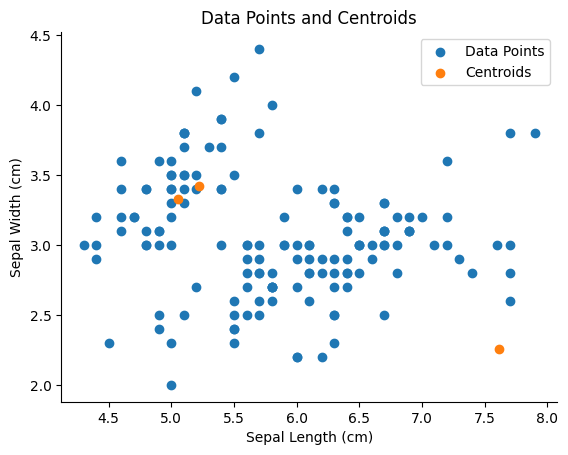

In [3]:
# Initialize number of centroids
k = number_of_clusters

# Create centroids
centroids = utility.create_centroids(sepal_length, sepal_width, k)

# Plot data points and centroids
utility.plot_data_and_centroids(sepal_length, sepal_width, centroids)

### Step 2: Assign data samples to the nearest centroid.

In [4]:
# Initialize cluster labels for each data point
cluster_labels = np.zeros(len(features))

# Assign the nearest centroid to each data point
for i in range(len(features)):
    cluster_labels[i] = utility.assign_to_nearest_centroid(features[i], centroids)

# Print cluster labels
print(cluster_labels)


[0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1.
 0. 1. 2. 0. 2. 1. 2. 0. 0. 1. 2. 1. 1. 0. 0. 0. 0. 2. 0. 0. 2. 1. 0. 0.
 2. 0. 0. 2. 2. 2. 0. 0. 1. 1. 0. 0. 0. 0. 2. 2. 0. 1. 1. 0. 0. 1. 0. 0.
 0. 0. 1. 0. 0. 0. 2. 0. 2. 2. 1. 2. 2. 2. 0. 2. 2. 0. 0. 0. 2. 2. 2. 0.
 2. 0. 2. 0. 2. 2. 0. 0. 2. 2. 2. 2. 2. 0. 0. 2. 0. 0. 0. 2. 2. 2. 0. 2.
 2. 2. 2. 2. 0. 0.]


### Step 3: Update centroids based on the above-assigned data samples.

In [5]:
# Create a copy of the old centroids for comparison
previous_centroids = deepcopy(centroids)

# Iterate over each centroid
for centroid_index in range(k):
    # Gather points assigned to the current centroid
    assigned_points = [sepal_dimensions[j] for j in range(len(sepal_dimensions)) if cluster_labels[j] == centroid_index]
    
    # Update the centroid to be the mean of the assigned points
    centroids[centroid_index] = np.mean(assigned_points, axis=0)

# Print the old and new centroids for comparison
for i in range(k):
    print(f"Old centroid {i}: {previous_centroids[i]}, New centroid {i}: {centroids[i]}")

Old centroid 0: [5.21747992 3.42137285], New centroid 0: [5.78955224 3.14925373]
Old centroid 1: [5.05546799 3.32527467], New centroid 1: [4.92380952 2.98809524]
Old centroid 2: [7.61424464 2.25652179], New centroid 2: [6.87317073 2.97804878]


### Step 4: Repeat steps 2 and 3 until the centroids do not change (Convergence).

In [6]:
# Initialize error for each centroid
centroid_errors = np.zeros(k)

# Calculate initial error for each centroid
for centroid_index in range(k):
  centroid_errors[centroid_index] = utility.calculate_euclidean_distance(centroids[centroid_index], previous_centroids[centroid_index])

In [7]:
# Continue updating centroids until error is zero for all centroids
while centroid_errors.all() != 0:

  # Assign each sample to the nearest centroid
  for sample_index in range(len(sepal_dimensions)):
    cluster_labels[sample_index] = utility.assign_to_nearest_centroid(sepal_dimensions[sample_index], centroids)

  # Create a copy of the old centroids for comparison
  previous_centroids = deepcopy(centroids)

  # Update each centroid
  for centroid_index in range(k):
    # Gather points assigned to the current centroid
    assigned_points = [sepal_dimensions[j] for j in range(len(sepal_dimensions)) if cluster_labels[j] == centroid_index]
    
    # Update the centroid to be the mean of the assigned points
    centroids[centroid_index] = np.mean(assigned_points, axis=0)

    # Calculate and print the error for the updated centroid
    centroid_errors[centroid_index] = utility.calculate_euclidean_distance(centroids[centroid_index], previous_centroids[centroid_index])
    print(f"Error for centroid {centroid_index}: {centroid_errors[centroid_index]}")

Error for centroid 0: 0.12196531750082949
Error for centroid 1: 0.1942869790781502
Error for centroid 2: 0.07128355144322428
Error for centroid 0: 0.12479119470974837
Error for centroid 1: 0.10625188379467594
Error for centroid 2: 0.014731391274720222
Error for centroid 0: 0.13948606004452876
Error for centroid 1: 0.06855109337560122
Error for centroid 2: 0.08054274323397594
Error for centroid 0: 0.060297770214248404
Error for centroid 1: 0.06246394474432782
Error for centroid 2: 0.013043412088808918
Error for centroid 0: 0.023031237010818675
Error for centroid 1: 0.013551654597639328
Error for centroid 2: 0.016059176608771326
Error for centroid 0: 0.0180986916755518
Error for centroid 1: 0.01952187034484299
Error for centroid 2: 0.0


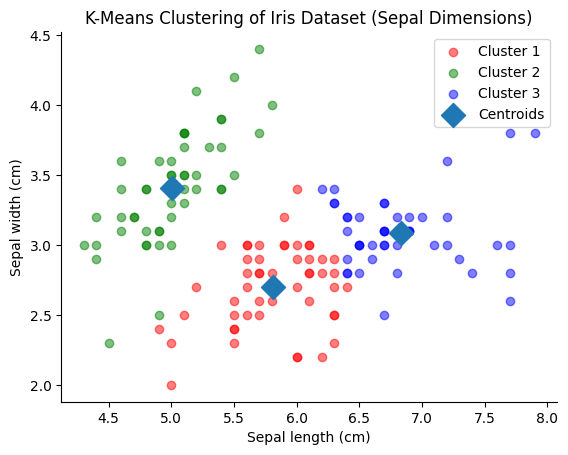

In [8]:
# Plot the final clusters and centroids
utility.plot_clusters(sepal_dimensions, centroids, cluster_labels, k)